**Cervical Cancer Classification Exercise**

Name: Craig Gossen

Date: 12/1/2022

Data source: https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk

Source:

Name: DR. Sobar
Institution: STIKES Indonesia Maju, Jakarta, Indonesia
Email: sobar2000 '@' gmail.com

Name: Prof. Rizanda Machmud
Institution: Universitas Andalas, Padang, Indonesia
Email: rizandamachmud '@' fk.unand.ac.id

Name: Adi Wijaya, PhD candidate
Institution: STIKES Indonesia Maju
Email: adiwjj '@' stikim.ac.id

This dataset contains 19 attributes and 72 instances. The dataset is regarding ca cervix behavior risk with class label is ca_cervix with 1 and 0 as values which means the respondent with and without ca cervix, respectively. The target is ca cervice. Each row of data is one individual. This dataset will be utilized to create a classification model to predict if an individual has cervical cancer. 

The low number of instances in this data could cause issues. 

#Load and clean data

In [1]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Machine Learning Fundamentals/03 Week 03: Classification Models/sobar-72.csv'
df = pd.read_csv(filename, header = 0)

In [4]:
eda_df = df

In [5]:
eda_df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [6]:
eda_df.shape

(72, 20)

In [7]:
eda_df.duplicated().sum()

0

In [8]:
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

In [9]:
eda_df.describe(include = 'all')

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


The dataset contains numeric data. The target variable has a class attribute 1=has cervical cancer, 0=no cervical cancer. There is no missing data. Data is ready for processing. 

#Preprocessing

In [10]:
#Train Test Split (TTS) Prep
X = eda_df.drop(columns = 'ca_cervix')
y = eda_df['ca_cervix']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
#Instantiate the Scaler
scaler = StandardScaler()

In [12]:
# Function for ease of classification report and visualization

def evaluate_classification(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

#Exploratory Data Visuals


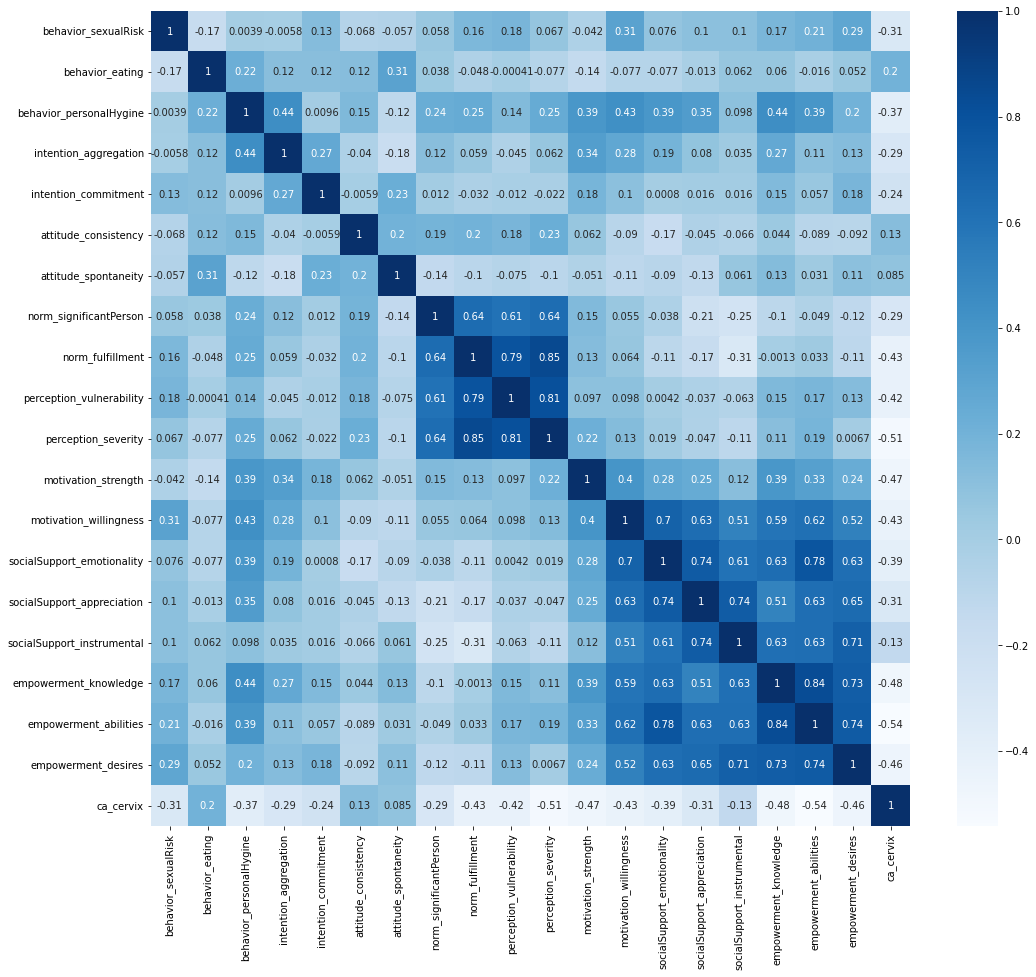

In [36]:
#CORRELATION
corr = eda_df.corr()

#Plot Correlation
plt.figure(figsize=(17, 15))
sns.heatmap(corr, cmap = 'Blues', annot = True); 

There is no correlation between a single data column and whether an individual is positive for cervical cancer. 

Additional exploratory plots do not appear to be logical to provide based upon the data set. 

# Logistic Regression Model

In [14]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [15]:
#Instantiate the model (l2 is default penalty so changed to later evaluate l1 and l2)
logreg = LogisticRegression(C = 1000, penalty ='none')

# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)

# Fit the model onto the data
logreg_pipe.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000, penalty='none'))])

In [16]:
#Score the model
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
0.9444444444444444


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93         7

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



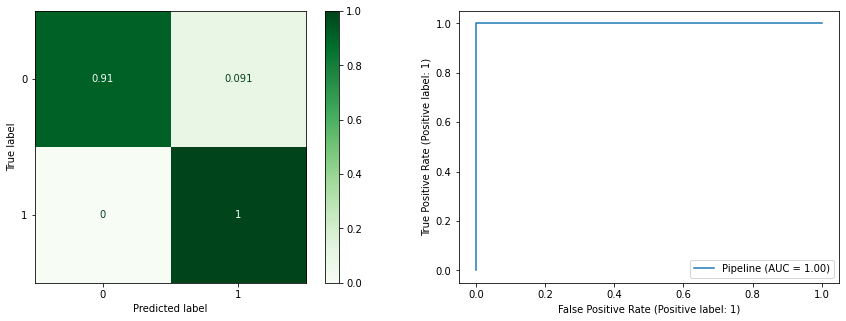

In [17]:
#Visualize and classification report
evaluate_classification(logreg_pipe, X_test, y_test, label='Test Data')

L1 Model

{0.0001: 0.6111111111111112,
 0.001: 0.6111111111111112,
 0.01: 0.6111111111111112,
 0.1: 0.7222222222222222,
 1: 1.0,
 10: 1.0,
 100: 1.0,
 1000: 0.9444444444444444}

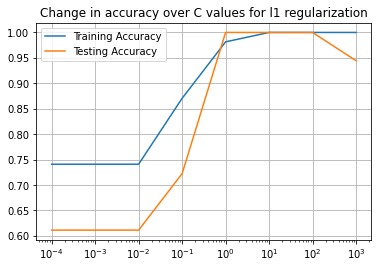

In [18]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.grid()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

C values of 1, 10 and 100 work equally well with a score of 1.0

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93         7

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



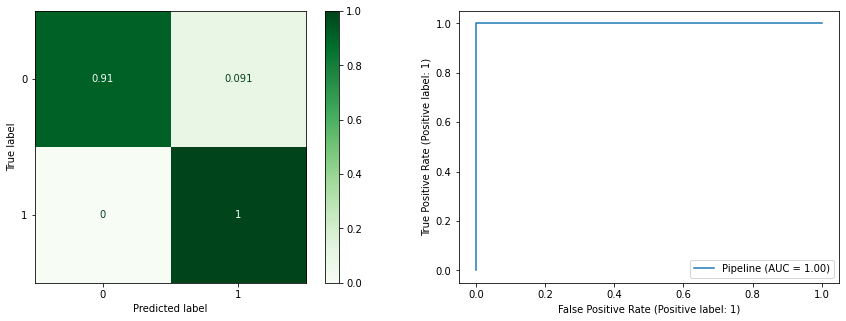

In [19]:
#Visualize and classification report
evaluate_classification(logreg_pipe, X_test, y_test, label='Test Data')

L2 Tuning

{0.0001: 0.8888888888888888,
 0.001: 0.8888888888888888,
 0.01: 0.9444444444444444,
 0.1: 1.0,
 1: 0.9444444444444444,
 10: 1.0,
 100: 1.0,
 1000: 1.0}

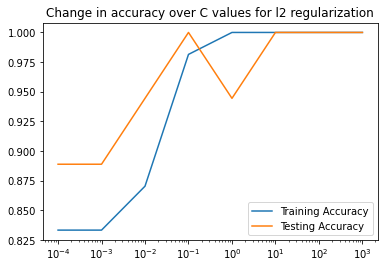

In [20]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

C values of .1, 10 and 100 work equally well with a score of 1.0

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93         7

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



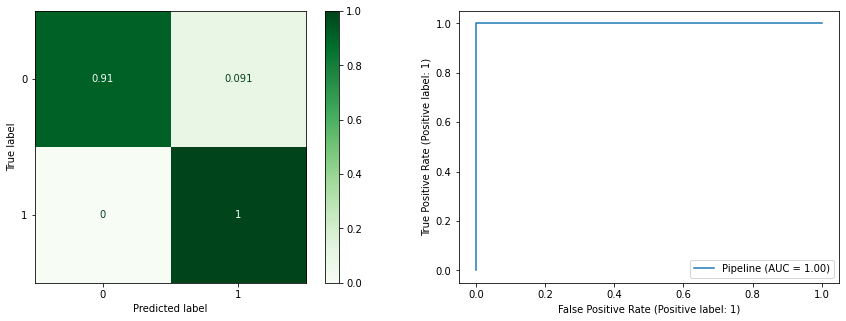

In [21]:
#Visualize and classification report
evaluate_classification(logreg_pipe, X_test, y_test, label='Test Data')

All three versions of logistic regression performed well with accuracies of 94%. Additionally all models showed zero false negatives (Type 2 errors) which would be considered expensive to any stakeholder. A 9.1% of false positives (Type 1 errors) is high and should be investigated. 

Decision Threshold


In [22]:
# Get the model probability predictions for the test set
test_probs = logreg_pipe.predict_proba(X_test)
test_probs[:5]

array([[5.55111512e-15, 1.00000000e+00],
       [1.00000000e+00, 3.46989224e-10],
       [1.36402360e-01, 8.63597640e-01],
       [3.19215804e-02, 9.68078420e-01],
       [1.00000000e+00, 4.06627304e-16]])

In [23]:
#Function to convert probabilities being greater than a given threshold
def convert_probs_to_preds(probabilities, threshold, pos_class=1):
  predictions = [1 if prob[pos_class] > threshold else 0 for prob in probabilities]
  return predictions

In [24]:
#Tune the classification model
# Create an array of float values between 0 and 1 with a step size of .05
thresholds = np.arange(start=0, stop=1.05, step=.05)
# Create empty recall and precision lists
recalls = []
precisions = []
accuracies = []
# Iterate over thresholds
for thresh in thresholds:
  # Convert probabilities to predictions according to each threshold
  preds = convert_probs_to_preds(test_probs, thresh)
  # Record the recall and precision for predictions at that threshold
  recalls.append(recall_score(y_test, preds))
  precisions.append(precision_score(y_test, preds))
  accuracies.append(accuracy_score(y_test, preds))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


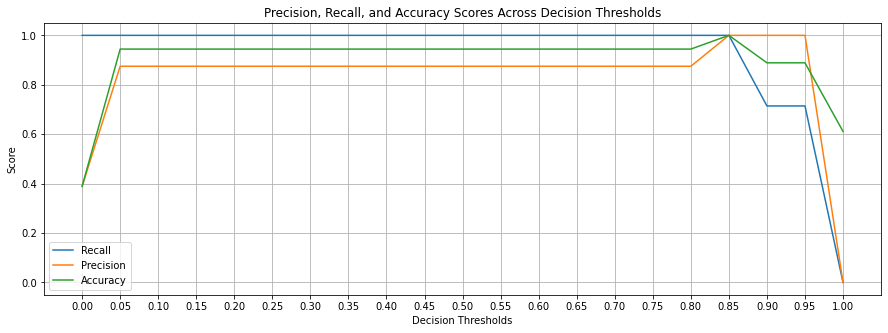

In [25]:
# Plot precisions and recalls for each probability
plt.figure(figsize=(15,5))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.legend()
plt.title('Precision, Recall, and Accuracy Scores Across Decision Thresholds')
plt.xlabel('Decision Thresholds')
plt.ylabel('Score')
plt.grid()
plt.xticks(thresholds)
plt.show()

The best decision threshold is 0.85 which maximizes recall, precision, and accuracy. 

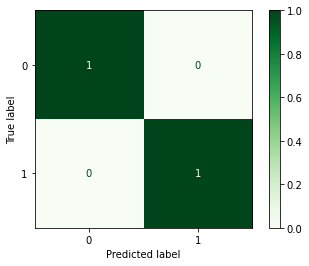

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [26]:
# Convert probabilites to class labels with a decision threshold of 0.85
test_preds = convert_probs_to_preds(test_probs, 0.85)
# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true',
                                        cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_test, test_preds))

The logistic regression model with a decision threshold of 0.85 is the best model to utilize. 

Overall, this dataset could benefit from a larger sample size as 72 instances is not large. It should be discussed with the stakeholder of obtaining more data or if cervical cancer data is limited. 

#Boosted Models

Gradient Boost

In [27]:
#Imports
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Predict onto the test data
preds = gbc.predict(X_test)

In [29]:
# Print a classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.71      0.83         7

    accuracy                           0.89        18
   macro avg       0.92      0.86      0.88        18
weighted avg       0.91      0.89      0.88        18



XG Boost - STILL TBD

In [30]:
#Imports
from xgboost import XGBRegressor

#Instantiate the model
xgb = XGBRegressor(n_estimators=300, max_depth=1)

#Fit the data onto the training set
xgb.fit(X_train, y_train)

#Predict onto the test set #see below
preds = xgb.predict(X_test)



[00:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored

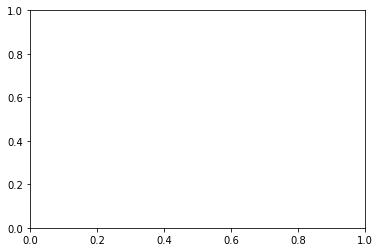

In [31]:
 #plot true labels
plt.scatter(X, y, label='True Values')
  #plot predicted labels
plt.scatter(X, y_pred, label='Predicted Values')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()